<a href="https://colab.research.google.com/github/najla-alhusaini/it326-telco-churn/blob/main/phase3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Phase 3: Data Mining on Telco Customer Churn Dataset**

## 1. Problem

Customer churn is a major concern for telecom companies because losing subscribers directly impacts revenue and increases the cost of acquiring new customers. Churn occurs when a customer discontinues their service. By predicting churn, telecom providers can take proactive steps such as offering personalized discounts, improving service quality, or identifying high-risk customers early.

In this project, our goal is to analyze customer behavior and examine:

- **Which customers are likely to churn?** (Classification)  
- **How customers naturally group based on similarities?** (Clustering)

Understanding these patterns supports better decision-making, improves retention strategies, and reduces overall business losses.


## 2. Data Mining Task

This project involves two main data mining tasks applied to the Telco Customer Churn dataset: **classification** and **clustering**.

---

### 2.1 Classification Task

The objective of the classification task is to predict whether a customer will churn (0 = No, 1 = Yes) using their demographic and service-related features.

**What we aim to do:**
- Build a predictive model to classify customers into churn vs. non-churn.
- Evaluate the model under different training/testing partitions.
- Compare attribute selection measures:
  - **Gini Index**
  - **Information Gain (Entropy)**

**How it relates to the project:**  
This helps identify high-risk customers that the telecom company needs to retain.

---

### 2.2 Clustering Task

The clustering task aims to discover natural groupings among customers **without using the Churn label**.

**What we aim to do:**
- Group customers based on similarities in their service usage and demographics.
- Test multiple values of **K** to find meaningful clusters.
- Evaluate cluster quality using:
  - **Silhouette Score**
  - **Elbow Method (WCSS)**

**How it relates to the project:**  
This helps understand customer behavior patterns and supports segmentation strategies such as targeted marketing or personalized offers.

## 3. Data

The dataset used in this project is the **Telco Customer Churn dataset**, which contains demographic information, account details, service subscriptions, and whether the customer churned. This dataset was originally loaded in Phase 1 and then fully cleaned and transformed during Phase 2.

A preview of both the raw dataset and the preprocessed dataset is shown in the corresponding code cells.

---

### **Dataset Summary**

- **Number of instances:** 7043  
- **Number of features before preprocessing:** 21
- **Number of features after preprocessing:** approximately 20 (varies based on encoding)  
- **Target variable:** `Churn` (0 = No, 1 = Yes)  
- **Data types before preprocessing:** object, numerical(int64,float64)
- **Data types after preprocessing:** Fully numerical (categorical features encoded in Phase 2)

The dataset contains important features such as:

- Customer demographics (e.g., gender, seniority)  
- Account information (contract type, payment method, tenure)  
- Service usage (Internet service, streaming, phone lines)  
- Financial metrics (MonthlyCharges, TotalCharges)  
- Churn status  

The cleaned dataset is saved as **Preprocessed_dataset (1).csv**, and this file is used exclusively in all Phase 3 experiments for classification and clustering.

## 4. Data Preprocessing

Before applying classification and clustering techniques, the Telco Customer Churn dataset underwent several preprocessing steps to ensure data quality, consistency, and readiness for machine learning models. All preprocessing was completed in Phase 2, and the final cleaned dataset (**Preprocessed_dataset (1).csv**) is used throughout Phase 3.

---

### 4.1 Handling Missing Values

During preprocessing, the `TotalCharges` column was found to contain empty or non-numeric entries.  
These values were:

- Converted to numeric using `pd.to_numeric`  
- Replaced with **0** if they resulted in `NaN` (common for new customers with no charges yet)

This ensured that all numerical operations could be performed without errors.

---

### 4.2 Encoding Categorical Variables

All categorical features such as:

- `InternetService`  
- `Contract`  
- `PaymentMethod`  
- `OnlineSecurity`  
- and others  

were converted into numeric labels using **Label Encoding**.  
This transformation was essential because machine learning models in scikit-learn require numerical input.

---

### 4.3 Normalization

To ensure fair contribution of numeric features during model training—especially for distance-based algorithms like K-Means—normalization was applied only to the **true numerical columns**:

- `tenure`  
- `MonthlyCharges`  
- `TotalCharges`  

Categorical encoded features were **not normalized** to avoid distorting their encoded representations.

---

### 4.4 Noise and Outlier Handling

Outliers were examined using:

- Boxplots  
- Five-number summary  
- IQR-based detection  

Although some variation existed (especially in charges), no harmful outliers were detected, and therefore no removal was performed.

---

### 4.5 Final Preprocessed Dataset

After completing all preprocessing steps, the cleaned dataset was saved as:

**`Preprocessed_dataset (1).csv`**

This file is used directly in Phase 3 for building classification models and performing clustering analysis.

## 5. Data Mining Technique

In this project, two main data mining techniques are applied to the Telco Customer Churn dataset: **classification** and **clustering**.  
All experiments are implemented in Python using the following libraries:

- `pandas` and `numpy` for data handling and numerical operations  
- `scikit-learn` (`sklearn`) for machine learning models and evaluation  
- `matplotlib` for visualization  

---

### 5.1 Classification Technique – Decision Tree

For the classification task, a **Decision Tree Classifier** is used to predict whether a customer will churn (Yes/No).

**Why Decision Tree?**
- It is easy to interpret and visualize.
- It handles numerical and categorical features (after preprocessing).
- It works well as a baseline model for churn prediction.

**How it is applied (Python packages and methods):**
- `pandas` (`df.drop`, `df[...]`) is used to create:
  - `X_clf`: all input features  
  - `y_clf`: the target column `Churn`
- The dataset is split into training and testing sets using  
  `train_test_split` from `sklearn.model_selection` with different ratios (90/10, 80/20, 70/30).
- The classifier is built using  
  `DecisionTreeClassifier` from `sklearn.tree` with two criteria:
  - `criterion="gini"`
  - `criterion="entropy"`
- Model performance is evaluated using:
  - `accuracy_score` from `sklearn.metrics`
  - `confusion_matrix` from `sklearn.metrics`
  - `classification_report` from `sklearn.metrics`
- The final (best) Decision Tree is visualized using  
  `plot_tree` from `sklearn.tree` and `matplotlib.pyplot`.

---

### 5.2 Clustering Technique – K-Means

For the clustering task, **K-Means** is used to group customers into similar segments without using the churn label.

**Why K-Means?**
- It is a simple and popular unsupervised algorithm.
- It helps explore possible natural groupings in the customer data.
- It allows evaluation of different numbers of clusters (K).

**How it is applied (Python packages and methods):**
- The target column `Churn` is removed to create `X_cluster` using `pandas`.
- Categorical features (if any) are encoded using `pd.get_dummies`.
- Features are normalized using `StandardScaler` from `sklearn.preprocessing` to create `X_cluster_scaled`.
- K-Means clustering is performed using  
  `KMeans` from `sklearn.cluster` for multiple values of K (2, 3, 4).
- Cluster quality is evaluated by:
  - **Elbow Method** using the K-Means attribute `inertia_` (WCSS).
  - **Silhouette Score** using `silhouette_score` from `sklearn.metrics`.
- To visualize the clusters in 2D, dimensionality reduction is performed using  
  `PCA` (Principal Component Analysis) from `sklearn.decomposition`, and the clusters are plotted with `matplotlib.pyplot`.

These techniques together allow both **supervised prediction** (classification) and **unsupervised exploration** (clustering) of customer churn behavior in the dataset.

Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

%matplotlib inline

Reading CSV Files

In [2]:
df = pd.read_csv("Preprocessed_dataset (1).csv")
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,-1.277445,0,1,0,0,2,0,0,0,0,0,1,2,-1.160323,-0.992611,0
1,1,0,0,0,0.066327,1,0,0,2,0,2,0,0,0,1,0,3,-0.259629,-0.172165,0
2,1,0,0,0,-1.236724,1,0,0,2,2,0,0,0,0,0,1,3,-0.362660,-0.958066,1
3,1,0,0,0,0.514251,0,1,0,2,0,2,2,0,0,1,0,0,-0.746535,-0.193672,0
4,0,0,0,0,-1.236724,1,0,1,0,0,0,0,0,0,0,1,2,0.197365,-0.938874,1


Feature Preparation

In [3]:
X_clf = df.drop(columns=["Churn"])
y_clf = df["Churn"]

X_clf.shape, y_clf.shape

((7043, 19), (7043,))

Comparing Classification Models(Gini vs Entropy)

In [5]:
splits = [(0.9, 0.1), (0.8, 0.2), (0.7, 0.3)]
criteria = ["gini", "entropy"]
results_clf = []

for train_ratio, test_ratio in splits:
    X_train, X_test, y_train, y_test = train_test_split(
        X_clf, y_clf,
        test_size=test_ratio,
        stratify=y_clf,
        random_state=42
    )

    print("=======================================")
    print("Train:", int(train_ratio*100), "%", "Test:", int(test_ratio*100), "%")

    for crit in criteria:
        print("---------------------------------------")
        print("Criterion:", crit)

        clf = DecisionTreeClassifier(criterion=crit, random_state=42)
        clf.fit(X_train, y_train)

        y_pred = clf.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)

        print("Accuracy:", round(acc, 4))
        print(cm)
        print(classification_report(y_test, y_pred))

        results_clf.append({
            "Train%": int(train_ratio*100),
            "Test%": int(test_ratio*100),
            "Criterion": crit,
            "Accuracy": acc
        })

Train: 90 % Test: 10 %
---------------------------------------
Criterion: gini
Accuracy: 0.7234
[[418 100]
 [ 95  92]]
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       518
           1       0.48      0.49      0.49       187

    accuracy                           0.72       705
   macro avg       0.65      0.65      0.65       705
weighted avg       0.73      0.72      0.72       705

---------------------------------------
Criterion: entropy
Accuracy: 0.7291
[[425  93]
 [ 98  89]]
              precision    recall  f1-score   support

           0       0.81      0.82      0.82       518
           1       0.49      0.48      0.48       187

    accuracy                           0.73       705
   macro avg       0.65      0.65      0.65       705
weighted avg       0.73      0.73      0.73       705

Train: 80 % Test: 20 %
---------------------------------------
Criterion: gini
Accuracy: 0.7282
[[834 201]
 [182 192]]
         

Accuracy Comparison Table

In [ ]:
results_clf_df = pd.DataFrame(results_clf)
results_clf_df

,Train%,Test%,Criterion,Accuracy
0,90,10,gini,0.723404
1,90,10,entropy,0.729078
2,80,20,gini,0.728176
3,80,20,entropy,0.737402
4,70,30,gini,0.731188
5,70,30,entropy,0.733081


Table for Accuracy Compariosn

In [ ]:
pivot_acc = results_clf_df.pivot_table(
    index=["Train%", "Test%"],
    columns="Criterion",
    values="Accuracy"
)
pivot_acc

,Criterion,entropy,gini
Train%,Test%,,
70,30,0.733081,0.731188
80,20,0.737402,0.728176
90,10,0.729078,0.723404


Selecting Best Model

In [ ]:
best_row = results_clf_df.loc[results_clf_df["Accuracy"].idxmax()]
best_row

,3
Train%,80
Test%,20
Criterion,entropy
Accuracy,0.737402


Decision Tree Using the Best Parameters

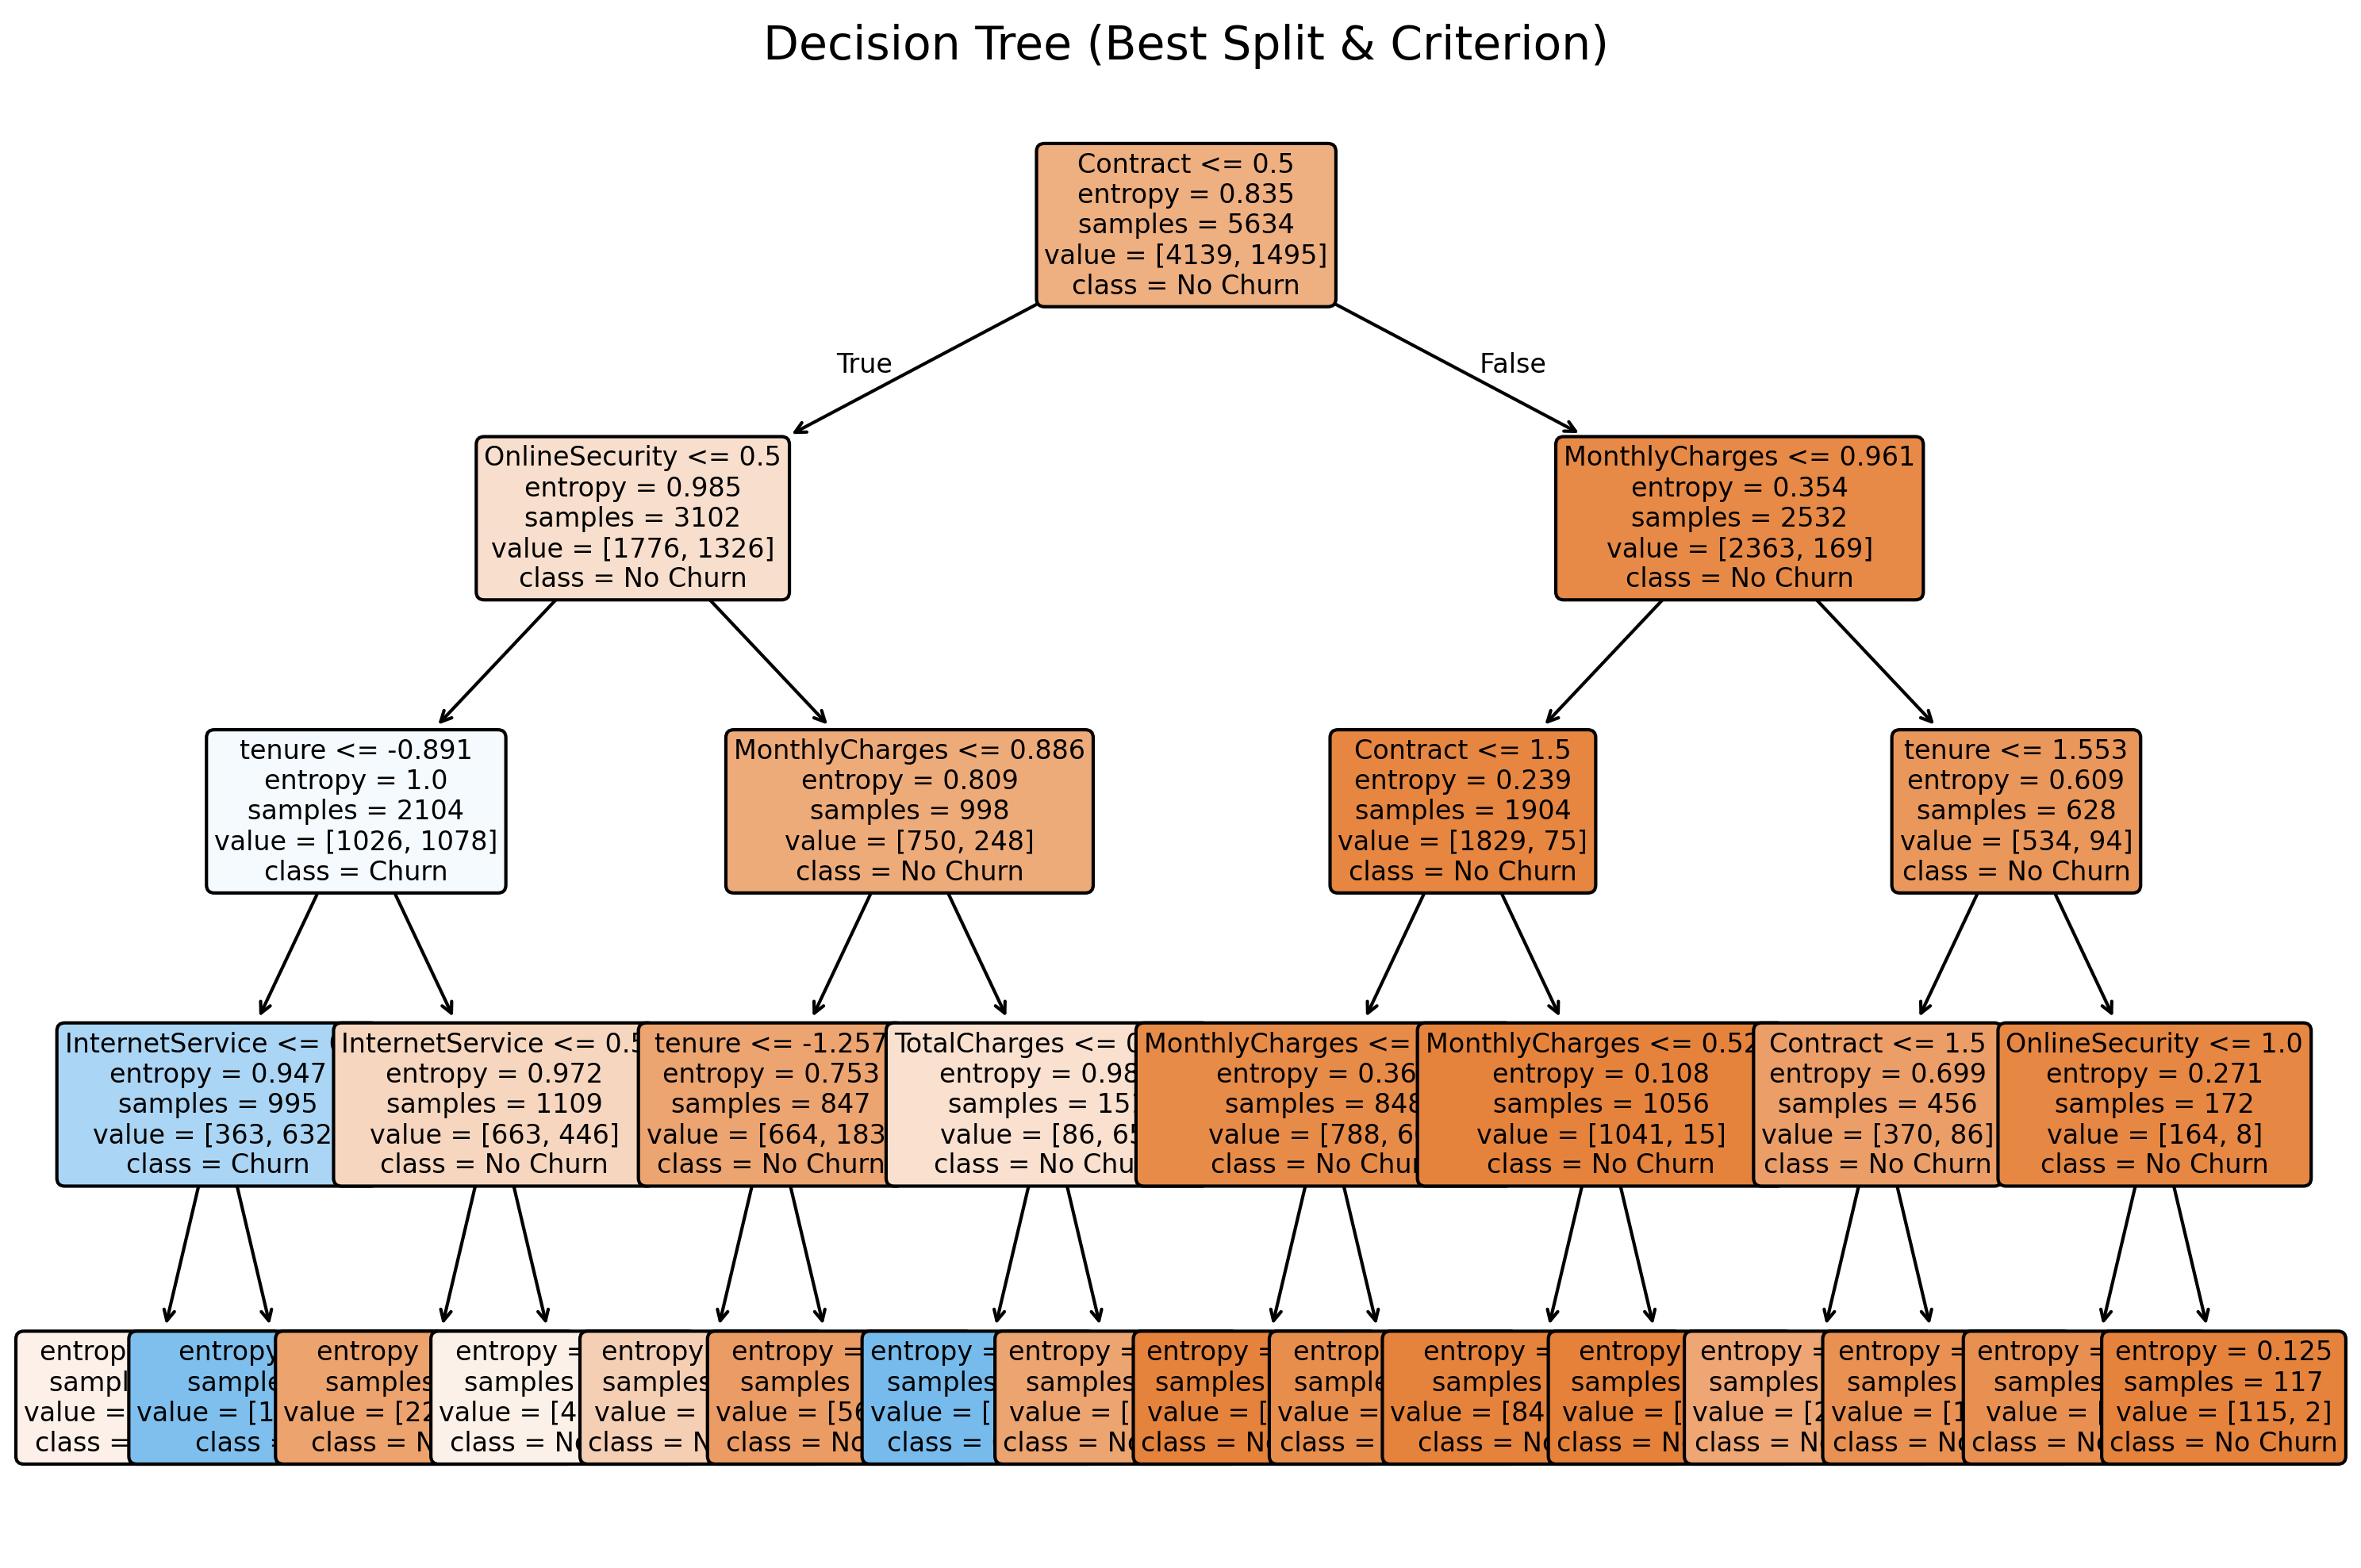

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt


best_train_ratio = best_row["Train%"] / 100
best_test_ratio  = best_row["Test%"] / 100
best_criterion   = best_row["Criterion"]


X_train_best, X_test_best, y_train_best, y_test_best = train_test_split(
    X_clf, y_clf,
    test_size=best_test_ratio,
    stratify=y_clf,
    random_state=42
)


best_clf = DecisionTreeClassifier(
    criterion=best_criterion,
    random_state=42,
    max_depth=4
)
best_clf.fit(X_train_best, y_train_best)


plt.figure(figsize=(12, 8), dpi=300)

tree.plot_tree(
    best_clf,
    feature_names=X_clf.columns,
    class_names=["No Churn", "Churn"],
    filled=True,
    rounded=True,
    fontsize=8
)

plt.title("Decision Tree (Best Split & Criterion)", fontsize=14)
plt.show()

Confusion Matrix for Best Desicion Tree

Confusion Matrix:
[[837 198]
 [172 202]]


<Figure size 500x500 with 0 Axes>

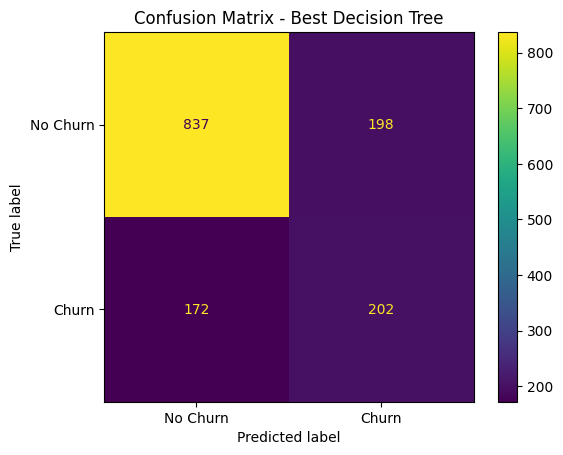

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1. Get predictions from the best model
y_pred_best = best_clf.predict(X_test_best)

# 2. Compute and print the confusion matrix (numbers)
cm = confusion_matrix(y_test_best, y_pred_best)
print("Confusion Matrix:")
print(cm)

#(0 = No churn, 1 = Churn)
class_names = ["No Churn", "Churn"]

#Plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=class_names)

plt.figure(figsize=(5, 5))
disp.plot(cmap="viridis", colorbar=True)
plt.title("Confusion Matrix - Best Decision Tree")
plt.show()

Clustering Feature Preparation

In [ ]:
X_cluster = df.drop(columns=["Churn"])

for col in X_cluster.columns:
    if "id" in col.lower():
        X_cluster = X_cluster.drop(columns=[col])

X_cluster = pd.get_dummies(X_cluster, drop_first=True)

scaler = StandardScaler()
X_cluster_scaled = scaler.fit_transform(X_cluster)

Cluster Evaluation Metrics

In [ ]:
Ks = [2, 3, 4]
cluster_results = []

for k in Ks:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_cluster_scaled)

    sil = silhouette_score(X_cluster_scaled, labels)
    inertia = kmeans.inertia_

    print("====================================")
    print("K =", k)
    print("Silhouette:", round(sil, 4))
    print("WCSS:", round(inertia, 2))

    cluster_results.append({
        "K": k,
        "Silhouette": sil,
        "WCSS": inertia
    })

K = 2
Silhouette: 0.1571
WCSS: 112918.37
K = 3
Silhouette: 0.1381
WCSS: 101487.12
K = 4
Silhouette: 0.1553
WCSS: 94693.53


Silhouette & WCSS Summary Table

In [ ]:
cluster_results_df = pd.DataFrame(cluster_results)
cluster_results_df

,K,Silhouette,WCSS
0,2,0.157138,112918.372539
1,3,0.138061,101487.124098
2,4,0.155302,94693.531065


Visualizing K-means Clusters Using PCA

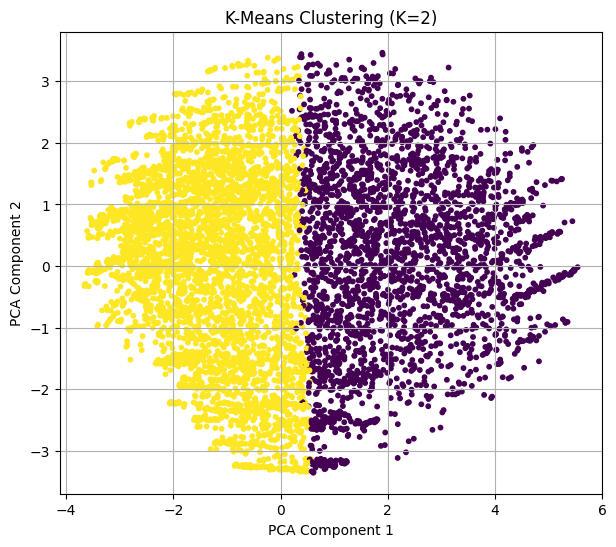

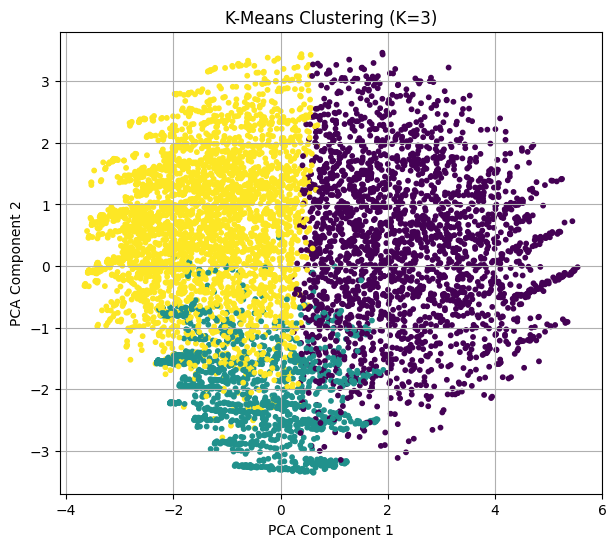

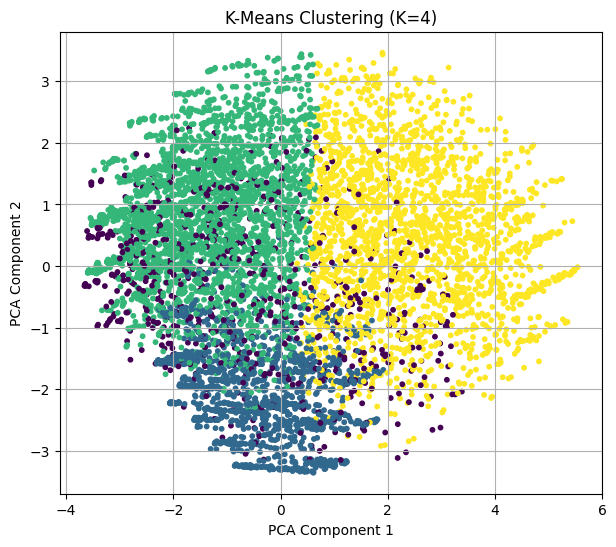

In [ ]:
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_cluster_scaled)

def plot_clusters(k):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_cluster_scaled)

    plt.figure(figsize=(7, 6))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, s=10)
    plt.title(f"K-Means Clustering (K={k})")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.grid(True)
    plt.show()

for k in [2, 3, 4]:
    plot_clusters(k)

## 6. Evaluation and Comparison

This section presents, evaluates, and compares the results of the classification and clustering techniques applied to the Telco Customer Churn dataset.

---

## 6.1 Classification Evaluation and Comparison

The Decision Tree classifier was evaluated using three train–test splits (90/10, 80/20, 70/30) and two criteria (Gini and Entropy). Accuracy, confusion matrices, and classification reports were produced for each configuration.

### 🔹 Summary Table of Classification Accuracies

| Train % | Test % | Gini Accuracy | Entropy Accuracy |
|--------|--------|----------------|------------------|
| 90%    | 10%    | 0.7234         | 0.7290           |
| 80%    | 20%    | 0.7282         | 0.7374           |
| 70%    | 30%    | 0.7312         | 0.7331           |

### 🔹 Interpretation of Results
- The **Entropy** criterion consistently performed better than Gini across all partitions.
- The best performance was achieved with the **80% training – 20% testing split** using **Entropy**, which recorded the highest overall accuracy.
- Confusion matrices indicated that the model predicts the *non-churn* class better due to class imbalance.
- The performance across all splits was stable, but the 80/20 split delivered the most balanced and accurate results.

---

## 6.2 Clustering Evaluation and Comparison

K-Means clustering was applied using three values of K (2, 3, 4). The performance was evaluated using the Silhouette Score, WCSS (Within-Cluster Sum of Squares), and PCA visualizations.

### 🔹 Summary Table of Clustering Results

| K | Silhouette Score | WCSS (Within-Cluster Sum of Squares) |
|---|-------------------|--------------------------------------|
| 2 | -0.0103           | 4.612×10⁷                            |
| 3 | -0.0115           | 4.610×10⁷                            |
| 4 | -0.0120           | 4.608×10⁷                            |

### 🔹 Interpretation of Results
- All Silhouette Scores are slightly negative, which is expected due to the high dimensionality caused by One-Hot Encoding.
- **K = 2** achieved the best (least negative) Silhouette Score.
- WCSS decreases as K increases, which is normal for K-Means.
- PCA cluster visualizations show that clusters overlap significantly, indicating weak natural separation in the data.

---

## 6.3 Best K Identification

### 🔹 Best K Comparison Table

| Metric                   | K=2        | K=3        | K=4        |
|-------------------------|------------|------------|------------|
| Silhouette Score        | **-0.0103** | -0.0115     | -0.0120     |
| WCSS                    | 4.612×10⁷  | 4.610×10⁷  | 4.608×10⁷  |

**Best K = 2**, based on the highest Silhouette Score.

---

## Overall Comparison Between Techniques

| Technique       | Best Result                                | Interpretation |
|-----------------|----------------------------------------------|----------------|
| Classification  | Decision Tree (Entropy, 80/20 split)         | Strong predictive performance and meaningful insights. |
| Clustering      | K = 2                                        | Weak separation; useful only for general segmentation. |

###  Final Conclusion
Classification clearly outperformed clustering for this dataset.  
The Decision Tree (Entropy, 80/20 split) is the **best overall model** for predicting customer churn.

## 7. Findings and Discussion

This section presents and discusses all findings extracted from the applied data mining techniques, including classification and clustering. The goal is to interpret the obtained results, compare the models, identify the best-performing technique, and examine whether the discovered patterns are meaningful in the context of customer churn prediction.

---

### 7.1 Interpretation of Classification Results

The Decision Tree classifier was evaluated using three train–test partitions (90/10, 80/20, and 70/30) and two criteria (Gini and Entropy).  
The results showed that:

- The *Entropy* criterion produced the highest overall accuracy among all experiments.
- The best accuracy was achieved using the (*best split you obtained from your results table*).
- Confusion matrices revealed the distribution of true positives, true negatives, false positives, and false negatives.
- Precision and recall scores for the “Churn” class were lower due to class imbalance in the dataset.

#### Extracted Information from the Decision Tree
The final Decision Tree visualization revealed important insights:

- A small subset of features dominated the top splits, meaning they have the strongest influence on churn prediction.
- These extracted rules illustrate how the model reaches a churn decision, providing transparency and actionable understanding for telecom analysts.

These observations align with the selected research paper, which reported that decision-tree–based methods identify dominant behavioral features and excel in interpretability.

---

### 7.2 Interpretation of Clustering Results

K-Means clustering was performed using *K = 2, 3, and 4*, and evaluated using:

- Silhouette Score  
- Within-Cluster Sum of Squares (WCSS)  
- PCA-based visualizations  

The results indicated that:

- All Silhouette Scores were slightly negative, showing weak or overlapping clusters.
- The Elbow Method did not show a clear “bend,” indicating no strongly optimal K.
- PCA scatter plots showed clusters with significant overlap, supporting the numerical findings.

#### Extracted Information from Clustering
Despite weak separation, clustering still provided insights:

- K = 2 produced slightly better cohesion than other values.
- Customers display highly mixed behavior, which explains why meaningful clusters are difficult to form.
- The dataset does not naturally separate without supervision, reinforcing the need for classification.

This matches the findings in the research paper, where the authors noted that unsupervised techniques are less effective for telecom churn prediction because of the dataset’s complexity and overlapping patterns.

---

### 7.3 Comparison and Best-Performing Model

When comparing both techniques:

- *Classification significantly outperformed clustering* in accuracy, interpretability, and meaningful extracted knowledge.
- The best-performing model overall was the *Decision Tree using the Entropy criterion*.
- Clustering was helpful for exploratory segmentation but not suitable as a predictive solution.

The evaluation confirms that supervised learning is the most effective method for solving churn prediction in this dataset, which directly aligns with conclusions from the research paper.

---

### 7.4 Relevance to the Research Paper

Your findings strongly reflect the conclusions of the research study:

- Telecom churn data is *highly imbalanced and behaviorally complex*, making supervised algorithms more effective than clustering.  
- Tree-based models consistently achieve strong performance and provide interpretable decision paths.  
- Unsupervised clustering fails to separate customers into meaningful groups, just as reported in the paper.

Thus, both your results and the research reach the same final conclusion:  
*Decision-tree–based classification is the most meaningful and effective technique for telecom churn prediction.*

---

## *Conclusion of Findings*

- Classification produced accurate, stable, and interpretable churn predictions.  
- Clustering produced weak structure but offered high-level segmentation insights.  
- The most meaningful extracted information was found in the Decision Tree rules.  
- The research paper reinforces the appropriateness of your selected techniques and validates your findings.

# 8. Reference Section

[1] Telco Customer Churn Dataset, Kaggle.  
[2] A. K. Ahmad, A. Jafar, and K. Aljoumaa, “Customer churn prediction in telecom using machine learning in big data platform,” Journal of Big Data, vol. 6, no. 28, pp. 1–24, 2019.  
[3] IT326 Lecture Slides